# Purchase Value Analysis for E-Commerce through Payment Types

## Problem Statement  
In the competitive e-commerce landscape, understanding customer behavior and maximizing revenue is critical for sustainable growth. This study aims to explore patterns in purchase value based on payment methods, leveraging data-driven insights to optimize strategies for enhancing revenue. By analyzing customer purchase data, we investigate the potential impact of payment methods (credit card and PayPal) on the total purchase value, providing actionable recommendations to improve revenue while maintaining a positive customer experience.

## Objective  
The primary goal of this project is to analyze the relationship between total purchase value and payment method using descriptive statistics and hypothesis testing (A/B test) in Python. Specifically, we aim to determine if there is a significant difference in purchase value for customers using credit cards compared to those using PayPal. Insights from this analysis can guide e-commerce platforms in tailoring payment strategies to maximize revenue generation without compromising user satisfaction.

## Research Question  
Is there a relationship between total purchase value and payment method, and can we influence customer preferences towards payment methods that result in higher purchase values while ensuring a seamless and satisfying customer experience?

# Importing the Dependencies

In [ ]:
import numpy as np                 # Imports the NumPy library for numerical operations.
import pandas as pd                # Imports Pandas for data manipulation and analysis.
import matplotlib.pyplot as plt    # Imports Matplotlib for data visualization.
import seaborn as sns              # Imports Seaborn for advanced data visualization.
import scipy.stats as stats        # Imports SciPy's stats module for statistical functions.
import statsmodels.api as sm       # Imports Statsmodels for advanced statistical modeling and testing.

import warnings                    # Imports warnings module to manage warning messages.
warnings.filterwarnings('ignore')  # Suppresses all warnings for a cleaner output.

# Loading the Dataset

In [ ]:
# Reads the dataset from the given URL into a DataFrame.
df = pd.read_csv('https://raw.githubusercontent.com/nafiul-araf/AB-Test/refs/heads/main/E-Commerce%20Purchase%20Test/purchase_data_exe.csv')

# Displays the first 5 rows of the DataFrame to get an initial view of the dataset.
df.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN


# Exploratory Data Analysis

In [ ]:
# Selects specific columns from the DataFrame for analysis.
df = df[['date', 'payment_method', 'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']]


df.head()

,date,payment_method,value [USD],time_on_site [Minutes],clicks_in_site
0,20/11/2018,credit,49.53,12.0,8
1,20/11/2018,paypal,50.61,25.9,8
2,20/11/2018,credit,85.99,34.9,11
3,20/11/2018,credit,34.60,16.5,9
4,20/11/2018,paypal,266.27,43.1,30


In [ ]:
df.shape # Prints the dimensions of the DataFrame (rows, columns).

(24999, 5)

In [ ]:
df.dtypes # Prints the data types of each column in the DataFrame.

,0
date,object
payment_method,object
value [USD],float64
time_on_site [Minutes],float64
clicks_in_site,int64


In [ ]:
# Converts the 'date' column to a DateTime object for easier manipulation.
df['date'] = pd.to_datetime(df['date'])

# Prints the updated data types of each column after conversion.
df.dtypes

,0
date,datetime64[ns]
payment_method,object
value [USD],float64
time_on_site [Minutes],float64
clicks_in_site,int64


In [ ]:
df.isnull().sum() # Counts the number of missing values in each column.

,0
date,0
payment_method,0
value [USD],0
time_on_site [Minutes],0
clicks_in_site,0


In [ ]:
df.duplicated().sum() # Counts the number of duplicate rows in the DataFrame.

0

In [ ]:
df.payment_method.value_counts(normalize = True) # Computes the proportion of each unique value in the 'payment_method' column.

,proportion
payment_method,
credit,0.578383
paypal,0.421617



**Key Observations:**

* **Credit:** 57.8383% of transactions were made using credit cards.
* **PayPal:** 42.1617% of transactions were made using PayPal.

**Overall:** Credit cards are slightly more popular than PayPal for transactions in this dataset.

In [ ]:
df.describe().round(3) # Provides summary statistics for numeric columns, rounded to 3 decimal places.

,date,value [USD],time_on_site [Minutes],clicks_in_site
count,24999,24999.000,24999.000,24999.000
mean,2018-11-24 05:07:11.585263360,203.249,73.133,16.040
min,2018-11-20 00:00:00,0.000,2.000,0.000
25%,2018-11-22 00:00:00,57.170,13.300,8.000
50%,2018-11-23 00:00:00,136.720,24.100,11.000
75%,2018-11-27 00:00:00,278.815,43.000,19.000
max,2018-11-29 00:00:00,2177.040,655.000,167.000
std,NaN,208.016,150.984,13.396


### Summary of the Statistics:

1. **Value [USD]:**
   - Average purchase value is \$203.25, with values ranging from \$0.00 to \$2,177.04.
   - Half of the purchases are below \$136.72 (median).
   - Most purchase values fall within \$57.17 to \$278.82, with values above $610.30 considered potential outliers.

2. **Time on Site [Minutes]:**
   - Customers spend an average of 73.13 minutes on the site, with durations ranging from 2 minutes to 655 minutes.
   - Half of the customers spend less than 24.10 minutes on the site (median).
   - Most session durations fall within 13.30 to 43.00 minutes, with values above 87.55 minutes considered potential outliers.

3. **Clicks in Site:**
   - Customers make an average of 16.04 clicks per visit, ranging from 0 to 167 clicks.
   - Half of the customers make fewer than 11 clicks (median).
   - Most click counts fall within 8.00 to 19.00 clicks, with values above 35.50 clicks considered potential outliers.

In summary, there are potential outliers in high purchase values, long session durations, and high click counts. These outliers may require further investigation or removal depending on the analysis goals.

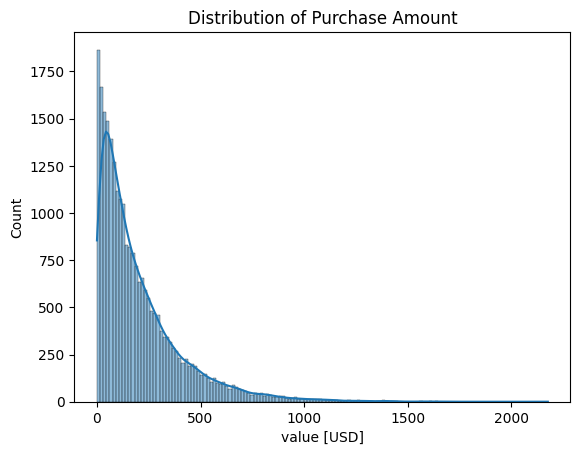

In [ ]:
# Creates a histogram of the 'value [USD]' column with a kernel density estimate overlay.
sns.histplot(data = df, x = 'value [USD]', kde = True)

# Sets the title of the plot.
plt.title('Distribution of Purchase Amount')
plt.show()

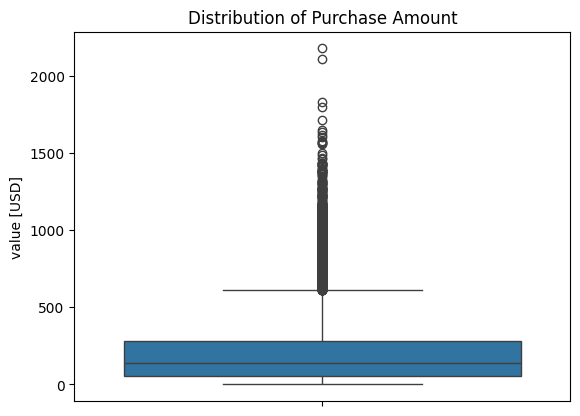

In [ ]:
# Creates a boxplot for the 'value [USD]' column to visualize its distribution and potential outliers.

sns.boxplot(data = df, y = 'value [USD]')
plt.title('Distribution of Purchase Amount')
plt.show()

In [ ]:
# Loops through all numeric columns in the DataFrame.

for col in df.select_dtypes(include = np.number).columns:
    print(f"Fpr column: {col}\n") # Prints the name of the column being analyzed.
    print(f"Minimum Value is: {df[col].min()}")  # Prints the minimum value in the column.
    print(f"1st Quantile is: {df[col].quantile(0.01)}") # Prints the 1st quantile (1st percentile) value in the column.
    print(f"10th Quantile is: {df[col].quantile(0.10)}") # Prints the 10th quantile (10th percentile) value in the column.
    print(f"25th Quantile is: {df[col].quantile(0.25)}") # Prints the 25th quantile (first quartile) value in the column.
    print(f"50th Quantile is: {df[col].quantile(0.50)}") # Prints the 50th quantile (median) value in the column.
    print(f"75th Quantile is: {df[col].quantile(0.75)}") # Prints the 75th quantile (third quartile) value in the column.
    print(f"90th Quantile is: {df[col].quantile(0.90)}") # Prints the 90th quantile value in the column.
    print(f"95th Quantile is: {df[col].quantile(0.95)}") # Prints the 95th quantile value in the column.
    print(f"99th Quantile is: {df[col].quantile(0.99)}") # Prints the 99th quantile value in the column.
    print(f"Maximum Value is: {df[col].max()}\n") # Prints the maximum value in the column and adds a blank line for readability.

Fpr column: value [USD]

Minimum Value is: 0.0
1st Quantile is: 1.9
10th Quantile is: 20.888
25th Quantile is: 57.17
50th Quantile is: 136.72
75th Quantile is: 278.815
90th Quantile is: 472.7380000000001
95th Quantile is: 621.6059999999999
99th Quantile is: 966.4948000000004
Maximum Value is: 2177.04

Fpr column: time_on_site [Minutes]

Minimum Value is: 2.0
1st Quantile is: 3.1
10th Quantile is: 7.6
25th Quantile is: 13.3
50th Quantile is: 24.1
75th Quantile is: 43.0
90th Quantile is: 89.22000000000007
95th Quantile is: 551.0
99th Quantile is: 598.0
Maximum Value is: 655.0

Fpr column: clicks_in_site

Minimum Value is: 0
1st Quantile is: 6.0
10th Quantile is: 6.0
25th Quantile is: 8.0
50th Quantile is: 11.0
75th Quantile is: 19.0
90th Quantile is: 32.0
95th Quantile is: 42.0
99th Quantile is: 71.0
Maximum Value is: 167



### Summary of Quantiles and Extreme Values:

#### **Value [USD]:**
- **Minimum:** \$0.00  
- **1st Quantile (1%):** \$1.90  
- **10th Quantile:** \$20.89  
- **25th Quantile (Q1):** \$57.17  
- **Median (50%):** \$136.72  
- **75th Quantile (Q3):** \$278.82  
- **90th Quantile:** \$472.74  
- **95th Quantile:** \$621.61  
- **99th Quantile:** \$966.49  
- **Maximum:** \$2,177.04  

Most purchase amounts fall within \$57.17 (Q1) and \$278.82 (Q3), with 10% of values exceeding \$472.74 and significant outliers above \$966.49.

---

#### **Time on Site [Minutes]:**
- **Minimum:** 2 minutes  
- **1st Quantile (1%):** 3.1 minutes  
- **10th Quantile:** 7.6 minutes  
- **25th Quantile (Q1):** 13.3 minutes  
- **Median (50%):** 24.1 minutes  
- **75th Quantile (Q3):** 43.0 minutes  
- **90th Quantile:** 89.22 minutes  
- **95th Quantile:** 551.0 minutes  
- **99th Quantile:** 598.0 minutes  
- **Maximum:** 655.0 minutes  

The majority of sessions last between 13.3 minutes (Q1) and 43.0 minutes (Q3), with extreme outliers beyond 598.0 minutes.

---

#### **Clicks in Site:**
- **Minimum:** 0 clicks  
- **1st Quantile (1%):** 6 clicks  
- **10th Quantile:** 6 clicks  
- **25th Quantile (Q1):** 8 clicks  
- **Median (50%):** 11 clicks  
- **75th Quantile (Q3):** 19 clicks  
- **90th Quantile:** 32 clicks  
- **95th Quantile:** 42 clicks  
- **99th Quantile:** 71 clicks  
- **Maximum:** 167 clicks  

The majority of visits involve between 8 clicks (Q1) and 19 clicks (Q3), with significant outliers above 71 clicks.

### **Quantile Summary**
#### **Value [USD]:**
- **Q1:** \$57.17  
- **Median:** \$136.72  
- **Q3:** \$278.82  
- **IQR (Q3 - Q1):** \$278.82 - \$57.17 = \$221.65  
- **Potential Outlier Thresholds:**  
  - **Lower Bound:** \$57.17 - (1.5 × \$221.65) = -\$275.30 (not applicable since values cannot be negative)  
  - **Upper Bound:** \$278.82 + (1.5 × \$221.65) = \$610.30

Values greater than \$610.30 could be considered outliers.

---

#### **Time on Site [Minutes]:**
- **Q1:** 13.3 minutes  
- **Median:** 24.1 minutes  
- **Q3:** 43.0 minutes  
- **IQR (Q3 - Q1):** 43.0 - 13.3 = 29.7 minutes  
- **Potential Outlier Thresholds:**  
  - **Lower Bound:** 13.3 - (1.5 × 29.7) = -31.25 minutes (not applicable since values cannot be negative)  
  - **Upper Bound:** 43.0 + (1.5 × 29.7) = 87.55 minutes  

Values greater than 87.55 minutes could be considered outliers.

---

#### **Clicks in Site:**
- **Q1:** 8 clicks  
- **Median:** 11 clicks  
- **Q3:** 19 clicks  
- **IQR (Q3 - Q1):** 19 - 8 = 11 clicks  
- **Potential Outlier Thresholds:**  
  - **Lower Bound:** 8 - (1.5 × 11) = -8.5 clicks (not applicable since values cannot be negative)  
  - **Upper Bound:** 19 + (1.5 × 11) = 35.5 clicks  

Values greater than 35.5 clicks could be considered outliers.

---

### **Set a Threshold**
1. **Value [USD]:**
   - Yes, consider filtering values greater than $610.30 as potential outliers. They may skew summary statistics.

2. **Time on Site [Minutes]:**
   - Yes, values greater than 87.55 minutes could be considered outliers as they represent sessions far longer than typical users.

3. **Clicks in Site:**
   - Yes, values greater than 35.5 clicks are potential outliers and could represent anomalous behavior.

---

### **Recommendation for Removing Outliers**
- **Value [USD] > $610.30**
- **Time on Site [Minutes] > 87.55**
- **Clicks in Site > 35.5**

In [ ]:
df = df[
    (df['value [USD]'] < 610.30) & # Filters rows where 'value [USD]' is below $610.30
    (df['time_on_site [Minutes]'] < 87.55) & # Filters rows where 'time_on_site [Minutes]' is below 87.55.
    (df['clicks_in_site'] < 36) # Filters rows where 'clicks_in_site' is below 36.
]

# Repeats the quantile calculations for the filtered numeric columns.
for col in df.select_dtypes(include = np.number).columns:
    print(f"Fpr column: {col}\n")
    print(f"Minimum Value is: {df[col].min()}")
    print(f"1st Quantile is: {df[col].quantile(0.01)}")
    print(f"10th Quantile is: {df[col].quantile(0.10)}")
    print(f"25th Quantile is: {df[col].quantile(0.25)}")
    print(f"50th Quantile is: {df[col].quantile(0.50)}")
    print(f"75th Quantile is: {df[col].quantile(0.75)}")
    print(f"90th Quantile is: {df[col].quantile(0.90)}")
    print(f"95th Quantile is: {df[col].quantile(0.95)}")
    print(f"99th Quantile is: {df[col].quantile(0.99)}")
    print(f"Maximum Value is: {df[col].max()}\n")

Fpr column: value [USD]

Minimum Value is: 0.0
1st Quantile is: 1.6419
10th Quantile is: 18.648
25th Quantile is: 50.97
50th Quantile is: 118.83
75th Quantile is: 226.87
90th Quantile is: 340.99100000000004
95th Quantile is: 420.13349999999997
99th Quantile is: 549.6541000000008
Maximum Value is: 610.27

Fpr column: time_on_site [Minutes]

Minimum Value is: 2.0
1st Quantile is: 2.9189999999999996
10th Quantile is: 7.0
25th Quantile is: 11.8
50th Quantile is: 20.4
75th Quantile is: 32.8
90th Quantile is: 47.4
95th Quantile is: 57.104999999999926
99th Quantile is: 75.48100000000014
Maximum Value is: 87.5

Fpr column: clicks_in_site

Minimum Value is: 0
1st Quantile is: 6.0
10th Quantile is: 6.0
25th Quantile is: 7.0
50th Quantile is: 10.0
75th Quantile is: 16.0
90th Quantile is: 24.0
95th Quantile is: 28.0
99th Quantile is: 34.0
Maximum Value is: 35



In [ ]:
# Resets the index of the DataFrame to a default integer index.
# The original index is dropped with `drop=True`.
# The change is applied in place, modifying the original DataFrame.

df.reset_index(drop = True, inplace = True)

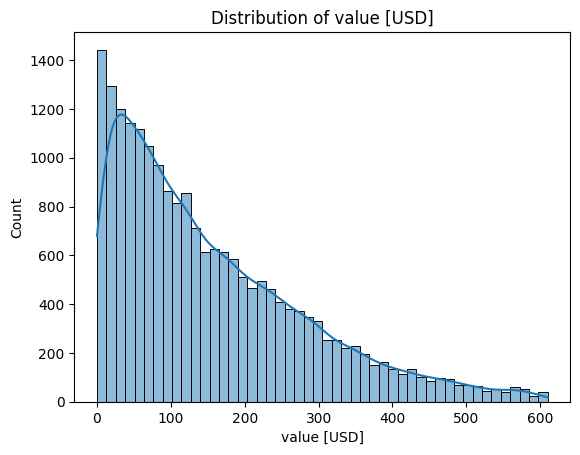

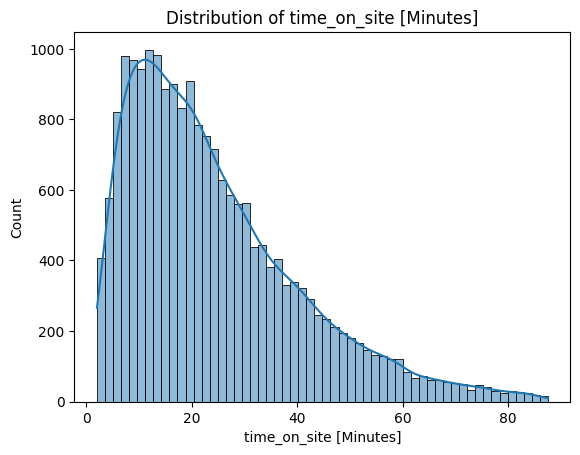

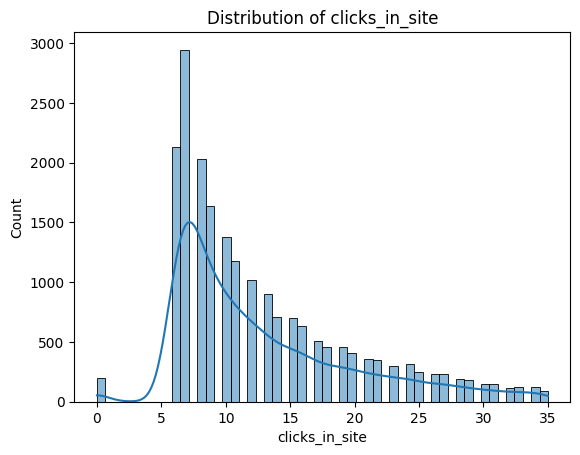

In [ ]:
# Loops through all numeric columns in the DataFrame.

for col in df.select_dtypes(include = np.number).columns:
    sns.histplot(data = df, x = col, kde = True) # Creates a histogram with a kernel density estimate for the current column.
    plt.title(f'Distribution of {col}')
    plt.show()

### Summary of the Histogram

1. **Purchase Amount:**
The histogram presents the distribution of values in USD. The data is positively skewed, meaning that there are more values in the lower range. The majority of the values fall between 0 and 200 USD, with a peak around 200 USD. As the value increases, the frequency of occurrence decreases. This indicates that a large portion of the dataset has relatively low values, while a smaller portion has higher values.

2. **Time on Site:**
The histogram displays the distribution of time spent on a website, measured in minutes. The data is positively skewed, indicating that a majority of users spend a relatively short time on the site. The most frequent time spent is between 0 and 20 minutes, with a peak around 10 minutes. As the time on site increases, the number of users decreases. This suggests that a significant portion of the user base spends a limited amount of time on the website, while a smaller portion stays for longer durations.

3. **Clicks in Site:**
The histogram illustrates the distribution of clicks made on a website. The data exhibits a right-skewed pattern, indicating that a majority of users tend to make a relatively small number of clicks. The most frequent number of clicks falls within the range of 0 to 10, with a peak around 5-7 clicks. As the number of clicks increases, the frequency of occurrence decreases. This suggests that a significant portion of users interact with the website minimally, while a smaller subset engages more extensively by clicking on multiple elements.

In [ ]:
df.shape

(20420, 5)

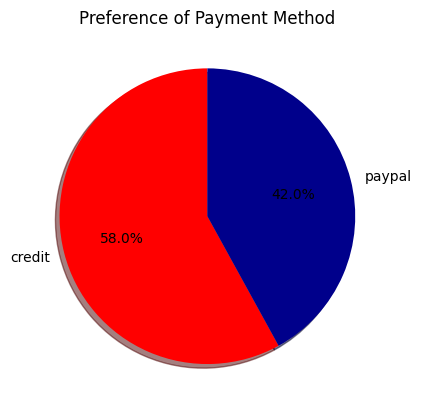

In [ ]:
# Set the title of the plot as 'Preference of Payment Method'
plt.title('Preference of Payment Method')

# Create a pie chart using the value counts of the 'payment_method' column, normalized to percentages
plt.pie(
    df['payment_method'].value_counts(normalize=True),  # Proportions of each payment method
    labels=df['payment_method'].value_counts().index,  # Labels for each payment method
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow effect to the pie chart
    autopct='%1.1f%%',  # Display percentage values on the chart with one decimal place
    colors=['red', 'darkblue']  # Use red and dark blue as the colors for the slices
)

# Display the pie chart
plt.show()


**Key Observations:**

* **Credit:** 58% of transactions were made using credit cards.
* **PayPal:** 42% of transactions were made using PayPal.

**Overall:** Credit cards are slightly more popular than PayPal for transactions in this dataset.

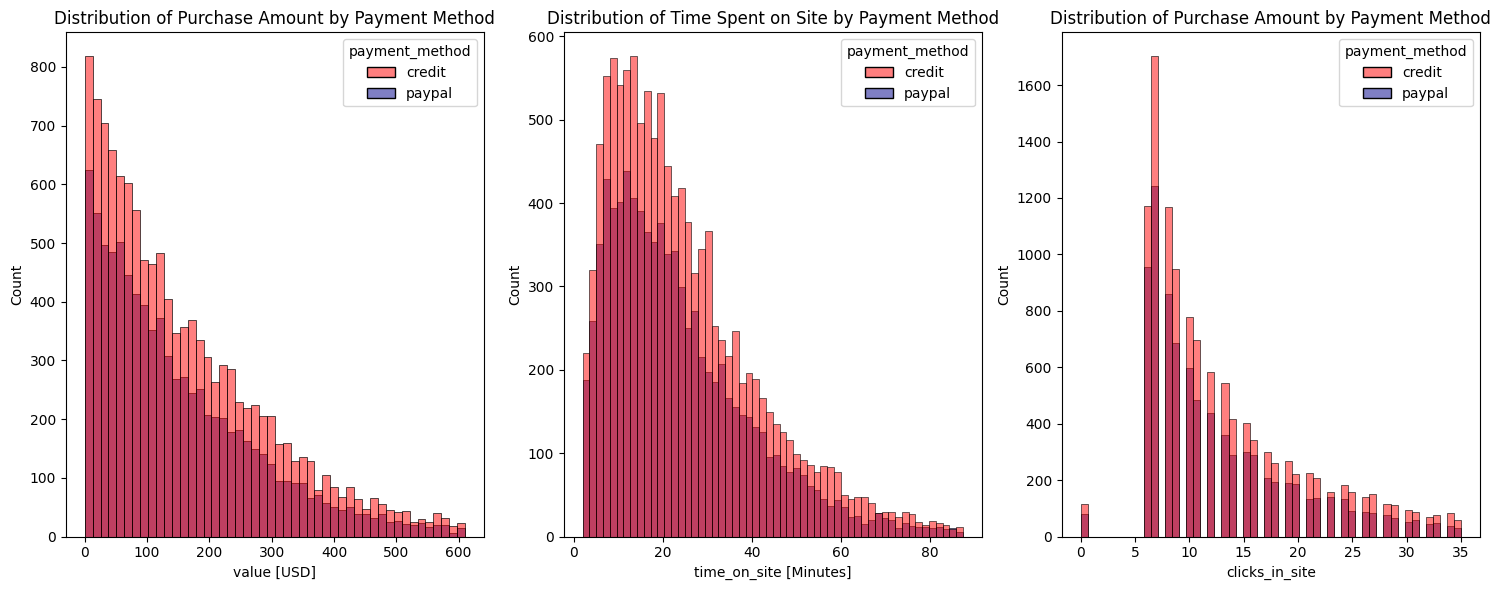

In [ ]:
# Creates a figure with 3 subplots arranged in a single row, each subplot of size 15x6 inches.
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

# Creates a histogram for 'value [USD]' with bars colored based on 'payment_method'.
sns.histplot(data = df, x = 'value [USD]', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ax = ax[0])
ax[0].set_title('Distribution of Purchase Amount by Payment Method') # Sets the title for the first subplot.

# Creates a histogram for 'time_on_site [Minutes]', colored by 'payment_method'.
sns.histplot(data = df, x = 'time_on_site [Minutes]', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ax = ax[1])
ax[1].set_title('Distribution of Time Spent on Site by Payment Method') # Sets the title for the second subplot.

# Creates a histogram for 'clicks_in_site', colored by 'payment_method'.
sns.histplot(data = df, x = 'clicks_in_site', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ax = ax[2])
ax[2].set_title('Distribution of Purchase Amount by Payment Method') # Sets the title for the third subplot.

plt.tight_layout() # Adjusts subplot spacing to avoid overlapping labels.
plt.show()

### Summary of Distribution

1. **Distribution of Purchase Amount by Payment Method:**
The leftmost histogram shows the distribution of purchase amounts by payment method. Both credit and PayPal payments exhibit a right-skewed distribution, indicating that a majority of transactions involve smaller amounts. Credit payments appear to have a slightly higher frequency of larger purchases compared to PayPal payments.

2. **Distribution of Time Spent on Site by Payment Method:**
The middle histogram displays the distribution of time spent on the site by payment method. Again, both payment methods show a right-skewed distribution, suggesting that most users spend a relatively short time on the site. The distribution for credit payments is slightly more spread out than that of PayPal payments, indicating a wider range of time spent on the site for credit users.

3. **Distribution of Purchase Amount by Payment Method:**
The rightmost histogram illustrates the distribution of clicks made on the site by payment method. Both payment methods show a right-skewed distribution, with a majority of users making a smaller number of clicks. The distribution for credit payments is slightly more spread out than that of PayPal payments, suggesting a wider range of click interactions for credit users.

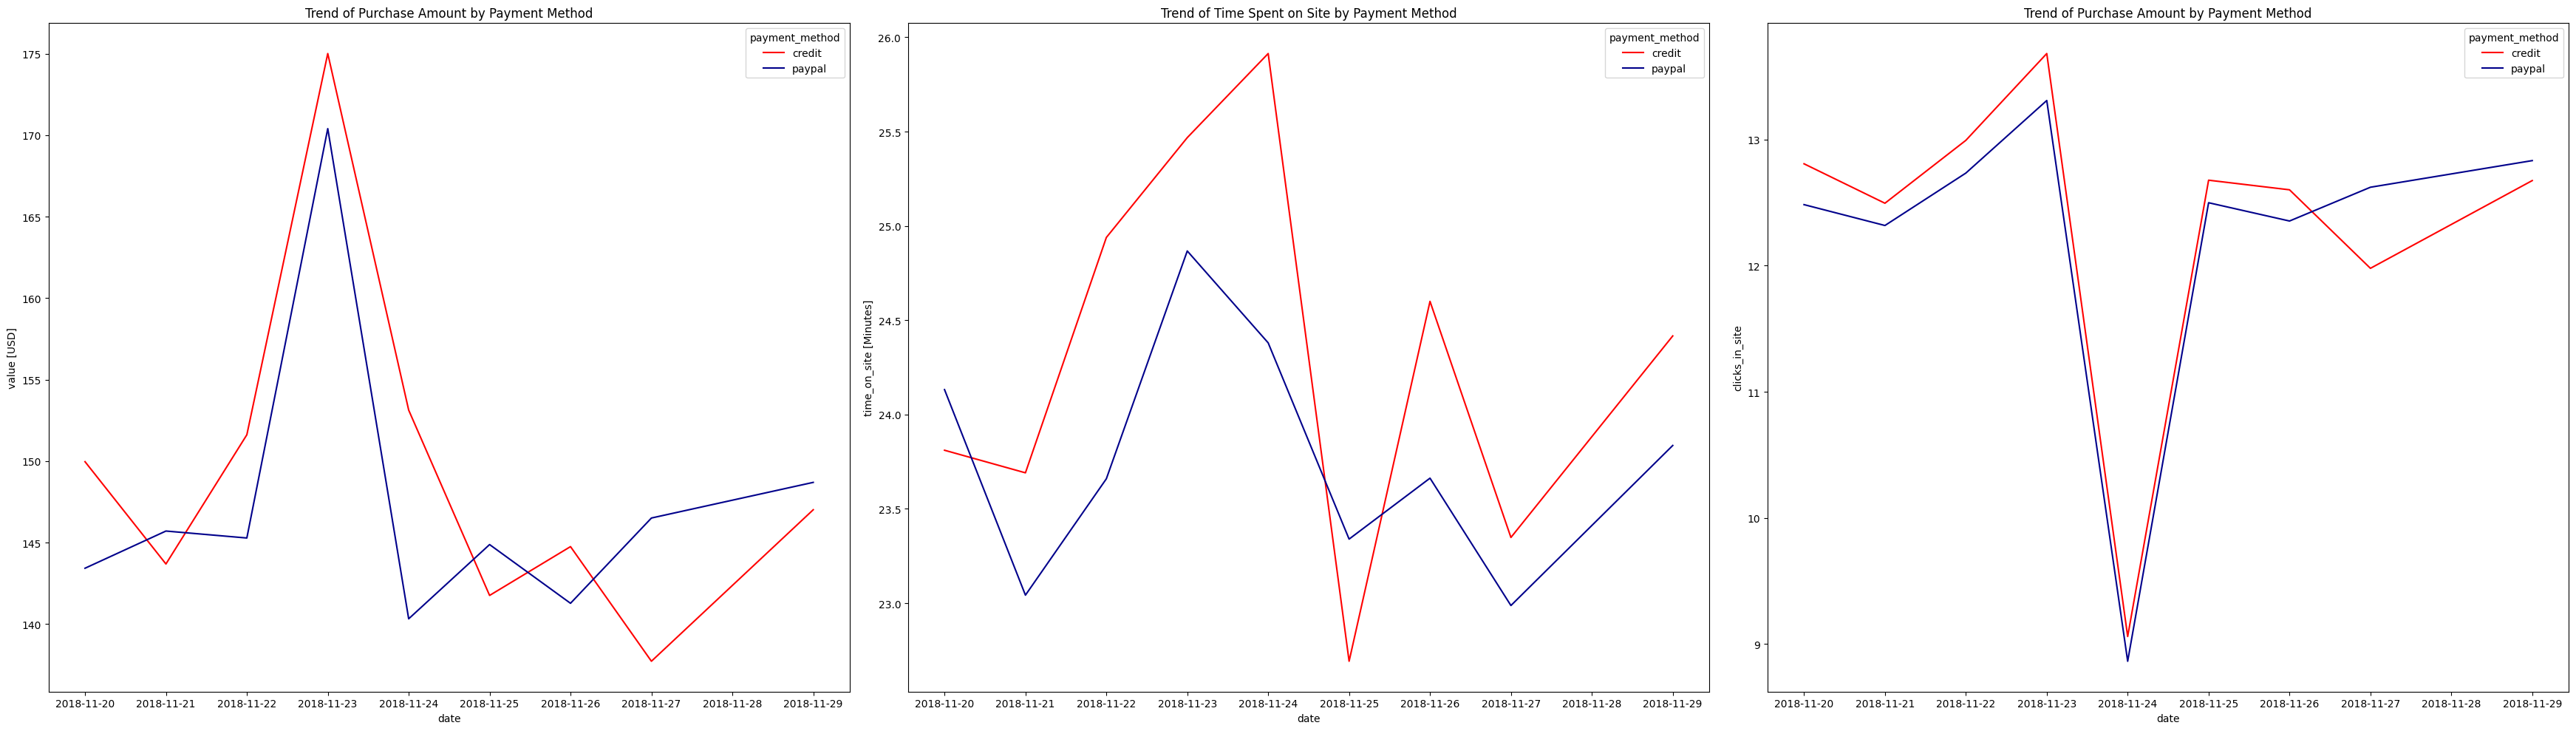

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (35, 10))

# Creates a line plot showing the trend of 'value [USD]' over 'date' for each 'payment_method', without confidence intervals.
sns.lineplot(data = df, x = 'date', y = 'value [USD]', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ci = None, ax = ax[0])
ax[0].set_title('Trend of Purchase Amount by Payment Method')

# Creates a line plot showing the trend of 'time_on_site [Minutes]' over 'date' for each 'payment_method', without confidence intervals.
sns.lineplot(data = df, x = 'date', y = 'time_on_site [Minutes]', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ci = None, ax = ax[1])
ax[1].set_title('Trend of Time Spent on Site by Payment Method')

# Creates a line plot showing the trend of 'clicks_in_site' over 'date' for each 'payment_method', without confidence intervals.
sns.lineplot(data = df, x = 'date', y = 'clicks_in_site', hue = 'payment_method', palette = {'credit': 'red', 'paypal': 'darkblue'}, ci = None, ax = ax[2])
ax[2].set_title('Trend of Purchase Amount by Payment Method')

plt.tight_layout()
plt.show()

### Summary of Trends

1. **Trend of Purchase Amount by Payment Method:**
The line plot illustrates the trend of purchase amounts by payment method over a specific time period. Two lines are displayed, representing credit and PayPal payments. The red line, representing credit payments, shows a sharp increase followed by a steep decline, indicating a significant fluctuation in purchase amounts. The blue line, representing PayPal payments, exhibits a more gradual upward trend with some fluctuations. Overall, the plot suggests that credit payments experienced a more dramatic change in purchase amounts compared to PayPal payments during the given timeframe.

2. **Trend of Time Spent on Site by Payment Method:**
The line plot illustrates the trend of time spent on site by payment method over a specific time period. Two lines are displayed, representing credit and PayPal payments. The red line, representing credit payments, shows a sharp increase followed by a steep decline, indicating a significant fluctuation in time spent on site. The blue line, representing PayPal payments, exhibits a more gradual upward trend with some fluctuations. Overall, the plot suggests that credit payments experienced a more dramatic change in time spent on site compared to PayPal payments during the given timeframe.

3. **Trend of Clicks in Site by Payment Method:**
The line plot illustrates the trend of clicks in site by payment method over a specific time period. Two lines are displayed, representing credit and PayPal payments. The red line, representing credit payments, shows a sharp increase followed by a steep decline, indicating a significant fluctuation in clicks in site. The blue line, representing PayPal payments, exhibits a more gradual upward trend with some fluctuations. Overall, the plot suggests that credit payments experienced a more dramatic change in clicks in site compared to PayPal payments during the given timeframe.

# Hypothesis Test

**Null Hypothesis (H₀):**  
There is no difference in the average purchase amount between customers who use Credit Cards and those who use PayPal for payment.

**Alternative Hypothesis (H₁):**  
There is a significant difference in the average purchase amount between customers who use Credit Cards and those who use PayPal for payment.

In [ ]:
df.head()

,date,payment_method,value [USD],time_on_site [Minutes],clicks_in_site
0,2018-11-20,credit,49.53,12.0,8
1,2018-11-20,paypal,50.61,25.9,8
2,2018-11-20,credit,85.99,34.9,11
3,2018-11-20,credit,34.60,16.5,9
4,2018-11-20,paypal,266.27,43.1,30


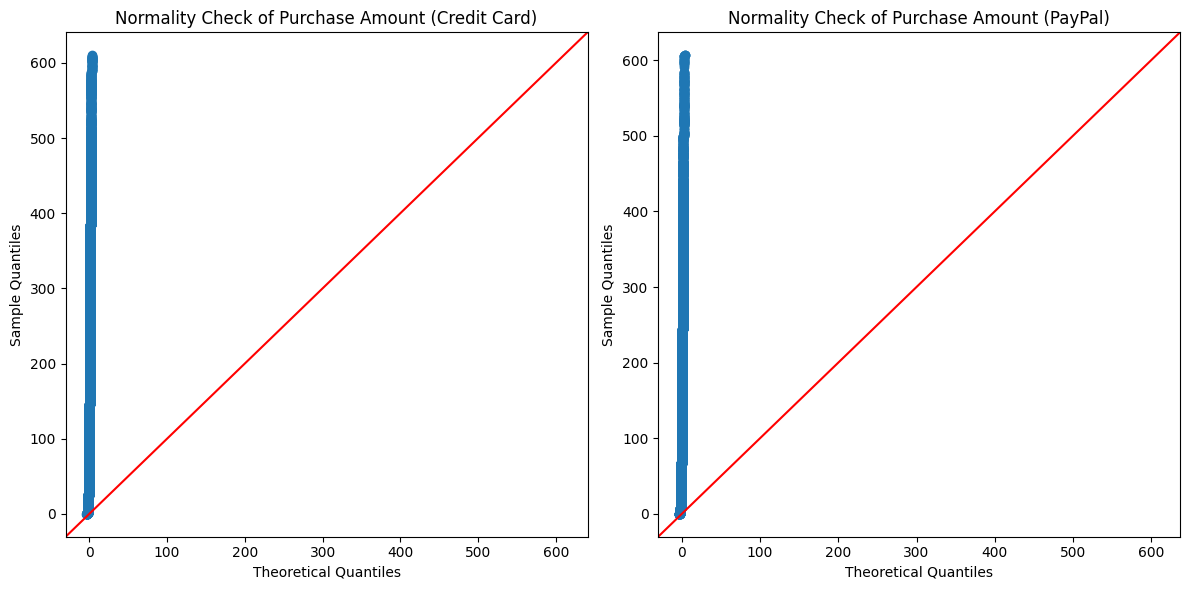

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns

# QQ plot for credit card payment method
sm.qqplot(df[df['payment_method'] == 'credit']['value [USD]'], line='45', ax=axes[0])
axes[0].set_title('Normality Check of Purchase Amount (Credit Card)')

# QQ plot for PayPal payment method
sm.qqplot(df[df['payment_method'] == 'paypal']['value [USD]'], line='45', ax=axes[1])
axes[1].set_title('Normality Check of Purchase Amount (PayPal)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Summary of QQ Plots

The two QQ plots visualize the distribution of purchase amounts for credit card and PayPal transactions, comparing them to a theoretical normal distribution. Both plots show a significant deviation from the expected diagonal line, indicating that neither dataset follows a normal distribution. The credit card plot shows a more pronounced deviation, suggesting a stronger departure from normality compared to PayPal transactions. This information is crucial for selecting appropriate statistical models and techniques for analysis, as many statistical methods assume normally distributed data.

### **Check is the data normal or not**

**Null and Alternative Hypotheses**:

1. **Null Hypothesis (H₀)**:  
   Data follow Normal Distribution.

2. **Alternative Hypothesis (H₁)**:  
   Data does not follow Normal Distribution

In [ ]:
def normality_check(data1, data2, alpha=0.05, group1='', group2=''):
  """
  Performs Shapiro-Wilk normality tests on two datasets and provides recommendations for subsequent statistical tests.

  Args:
    data1: The first dataset to be tested for normality.
    data2: The second dataset to be tested for normality.
    alpha: The significance level for the normality tests (default: 0.05).
    group1: A string representing the label for the first dataset (optional).
    group2: A string representing the label for the second dataset (optional).

  Returns:
    None. Prints test results and recommendations to the console.

  This function conducts Shapiro-Wilk tests on both input datasets to assess their normality.
  Based on the p-values from the tests, it provides recommendations for appropriate statistical tests:

  - If both datasets are not normally distributed, it suggests using the Mann-Whitney U-test.
  - If both datasets are normally distributed, it suggests proceeding to the Levene test to check for homogeneity of variances.
  - If only one dataset is normally distributed, it recommends using a non-parametric test like the Mann-Whitney U-test.

  **Note:** This function assumes that the input datasets are independent samples.
  """
  stat1, p1 = stats.shapiro(data1)
  stat2, p2 = stats.shapiro(data2)

  # Print test results
  print(f"For {group1}\nTest Statistic: {stat1} and P-Value: {p1}\n")
  print(f"For {group2}\nTest Statistic: {stat2} and P-Value: {p2}\n")

  # Evaluate normality conditions
  if p1 < alpha and p2 < alpha:
    print(f"Both {group1} and {group2} have P < {alpha}. Data in both groups are not normally distributed. Go to Mann-Whitney U-Test.")
  elif p1 > alpha and p2 > alpha:
    print(f"Both {group1} and {group2} have P > {alpha}. Data in both groups are normally distributed. Go to Levene Test to test the homogeneity of variances.")
  elif p1 < alpha and p2 > alpha:
    print(f"{group1} has P < {alpha} (not normally distributed), but {group2} has P > {alpha} (normally distributed). Go to a non-parametric test like Mann-Whitney U-Test.")
  elif p1 > alpha and p2 < alpha:
    print(f"{group1} has P > {alpha} (normally distributed), but {group2} has P < {alpha} (not normally distributed). Go to a non-parametric test like Mann-Whitney U-Test.")
  else:
    print("Unexpected behavior. Check your data and input values.")

In [ ]:
normality_check(data1 = df[df['payment_method'] == 'credit']['value [USD]'],
                data2 = df[df['payment_method'] == 'paypal']['value [USD]'],
                alpha=0.05, group1='Purchase Value with Credit Card', group2='Purchase Value with PayPal')

For Purchase Value with Credit Card
Test Statistic: 0.9025512149981728 and P-Value: 2.8487585922491523e-65

For Purchase Value with PayPal
Test Statistic: 0.8963434335308784 and P-Value: 5.199502315071648e-60

Both Purchase Value with Credit Card and Purchase Value with PayPal have P < 0.05. Data in both groups are not normally distributed. Go to Mann-Whitney U-Test.


### Normality Check Results

The Shapiro-Wilk test was conducted to assess the normality of purchase amounts for both credit card and PayPal transactions. The results indicate that both distributions deviate significantly from a normal distribution. The p-values for both credit card and PayPal transactions are extremely small, suggesting strong evidence against the null hypothesis of normality. As a result, the Mann-Whitney U test, a non-parametric alternative, is recommended for comparing the distributions of purchase amounts between the two payment methods.

In [ ]:
def mann_whitley_U(group1, group2, alpha = 0.05):
  """
  Performs the Mann-Whitney U test to compare the distributions of two independent samples.

  Args:
    group1: The first group of data points.
    group2: The second group of data points.
    alpha: The significance level for the test (default: 0.05).

  Returns:
    None. Prints the test statistic, p-value, and a conclusion about the null hypothesis.

  This function conducts the Mann-Whitney U test, a non-parametric test used to compare the distributions
  of two independent groups when the assumption of normality is violated.

  The test assesses whether the two groups are likely to have been drawn from the same population.

  **Note:** This function assumes that the input datasets are independent samples.
  """
  stat, p = stats.mannwhitneyu(group1, group2)

  print(f"Test Statistics: {stat} and P-Value: {p}\n")

  if p < alpha:
    print(f"Given that P < {alpha}, we reject the null hypothesis. There is a significant difference in the distributions of the two groups.")
  else:
    print(f"Given that P > {alpha}, we fail to reject the null hypothesis. There is no significant difference in the distributions of the two groups.")

In [ ]:
mann_whitley_U(group1 = df[df['payment_method'] == 'credit']['value [USD]'], group2 = df[df['payment_method'] == 'paypal']['value [USD]'])

Test Statistics: 52352696.0 and P-Value: 0.00016607072746184842

Given that P < 0.05, we reject the null hypothesis. There is a significant difference in the distributions of the two groups.


### Mann-Whitney U Test Results

The Mann-Whitney U test was performed to compare the distributions of purchase amounts between credit card and PayPal transactions. The test yielded a statistically significant result (p-value < 0.05), indicating that the distributions of purchase amounts for credit card and PayPal transactions are significantly different. This suggests that the average purchase amount may differ between the two payment methods, although the test itself does not provide information about the direction of the difference. Further analysis would be needed to determine whether credit card or PayPal transactions tend to have higher average purchase amounts.

In [ ]:
print(f"""The Mean of Purchase Amount using Credit Card is {np.round(df[df['payment_method'] == 'credit']['value [USD]'].mean(), 3)},\n
The Mean of Purchase Amount using PayPal is {np.round(df[df['payment_method'] == 'paypal']['value [USD]'].mean(), 3)},\n
The Difference between Them is {np.round(df[df['payment_method'] == 'credit']['value [USD]'].mean() - df[df['payment_method'] == 'paypal']['value [USD]'].mean(), 3)}
""")

The Mean of Purchase Amount using Credit Card is 157.201,

The Mean of Purchase Amount using PayPal is 149.022,

The Difference between Them is 8.18



# Summary of Analysis

The analysis aimed to compare the characteristics of purchase amounts between credit card and PayPal transactions.

1. **Normality Check:**
Shapiro-Wilk tests revealed that the distributions of purchase amounts for both credit card and PayPal transactions significantly deviated from normality.

2. **Mann-Whitney U Test:**
Due to the non-normal distributions, the Mann-Whitney U test was employed to compare the distributions of purchase amounts between the two payment methods.

3. **Test Results:**
The test yielded a statistically significant result (p-value < 0.05), indicating a significant difference in the distributions of purchase amounts between credit card and PayPal transactions.

4. **Mean Purchase Amounts:**
The mean purchase amount for credit card transactions was found to be \$157.201, while the mean purchase amount for PayPal transactions was $149.022.

5. **Difference in Means:**
The difference in mean purchase amounts between credit card and PayPal transactions was $8.18, suggesting that, on average, credit card transactions tend to have higher purchase amounts than PayPal transactions.

6. **Overall:**
The analysis provides evidence that there are statistically significant differences in the distributions of purchase amounts between credit card and PayPal transactions. The higher mean purchase amount for credit card transactions suggests that customers using credit cards tend to spend more on average compared to those using PayPal.

7. **Further Analysis:**
Further investigation could explore the reasons behind this difference, such as potential factors influencing purchase behavior when using different payment methods.